In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'

In [3]:
df_cat = pd.read_csv(f'{combine_fold}/cosmos2020-categorised-interactions.csv', index_col = 0)

In [4]:
df_cat.category.value_counts()

stage4    1165
stage2    1063
stage1     793
stage3     775
Name: category, dtype: int64

In [5]:
df_comb = pd.read_csv(f'{data_folder}/secondaries-identified.csv', index_col = 0).reset_index().rename(columns = {'index':'SourceID', '0':'merger'})
df_comb

,SourceID,merger
0,4000705532455,n
1,4000705532984,nm
2,4000705533312,y
3,4000705533383,n
4,4000705539435,l
...,...,...
3781,6000536185363,nm
3782,6000536185496,n
3783,6000536185585,b
3784,6000536185603,nm


### Plotting Stage w/ Visual Classification
Here, we're conducting a basic diagnostic. I want to see the spread in my visual classification against the stages.

In [6]:
df_merg = df_cat[['ORyan23_ID', 'category']].merge(df_comb, right_on = 'SourceID', left_on = 'ORyan23_ID', how = 'left')

In [7]:
df_merg.at[608, 'merger'] = 'n'
df_merg.at[1305, 'merger'] = 'n'

In [8]:
df_merg.merger.value_counts()

n    2180
y    1416
b     200
Name: merger, dtype: int64

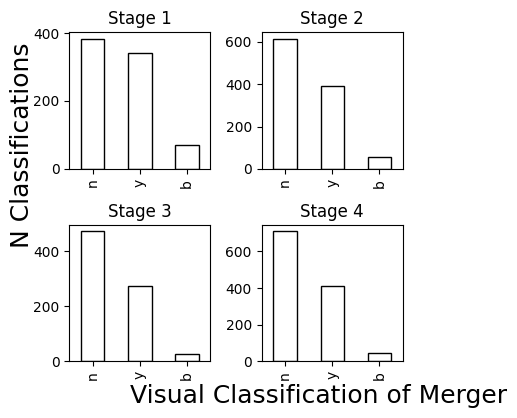

In [15]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (4,4))

counter = 1
for i in range(2):
    for j in range(2):
        df = df_merg.query(f'category == "stage{counter}"')
        values = df.merger.value_counts()
        values.plot.bar(
            ax = ax[i,j],
            fill=False,
            title = f'Stage {counter}'
        )
        counter += 1
fig.text(0.28, -0.02, 'Visual Classification of Merger', fontsize = 18)
fig.text(-0.02,0.38, 'N Classifications', fontsize = 18, rotation = 'vertical')
fig.tight_layout()
fig.savefig('C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures/visualisation_classification.pdf', bbox_inches = 'tight')

In [10]:
df_merg.category.value_counts()

stage4    1165
stage2    1063
stage1     793
stage3     775
Name: category, dtype: int64

In [11]:
x = ['Stage 1', 'Stage 2', 'Stage 3','Stage 4']
y = [793, 1063, 775, 1165]

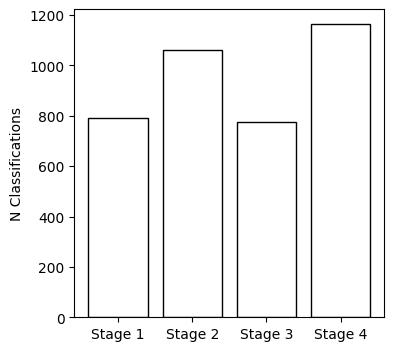

In [16]:
plt.figure(figsize = (4,4))
plt.bar(x, y, fill = False)
plt.ylabel('N Classifications')
plt.savefig(f'{fig_folder}/n-classifications-stages.pdf', bbox_inches = 'tight')
plt.show()